In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [5]:
df=pd.read_csv("Income.csv")
df.head()

,Name,Age,Income($),class
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income($)')

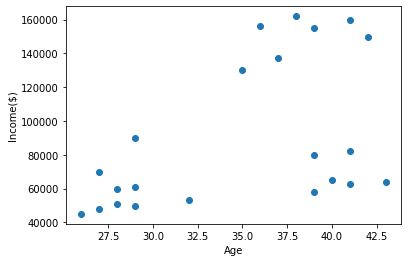

In [6]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [20]:
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [21]:
df['cluster']=y_predicted
df.head()



,Name,Age,Income($),class,clister,cluster
0,Rob,27,70000,1,KMeans(n_clusters=3),1
1,Michael,29,90000,1,KMeans(n_clusters=3),1
2,Mohan,29,61000,1,KMeans(n_clusters=3),2
3,Ismail,28,60000,1,KMeans(n_clusters=3),2
4,Kory,42,150000,0,KMeans(n_clusters=3),0


In [22]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

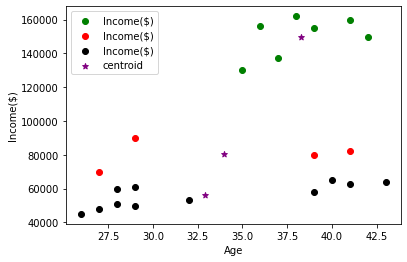

In [23]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# preprocessing using min max scaler


In [31]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']= scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [32]:
df.head()

,Name,Age,Income($),class,clister,cluster
0,Rob,0.058824,0.213675,1,KMeans(n_clusters=3),1
1,Michael,0.176471,0.384615,1,KMeans(n_clusters=3),1
2,Mohan,0.176471,0.136752,1,KMeans(n_clusters=3),2
3,Ismail,0.117647,0.128205,1,KMeans(n_clusters=3),2
4,Kory,0.941176,0.897436,0,KMeans(n_clusters=3),0


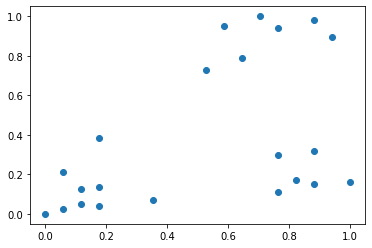

In [33]:
plt.scatter(df.Age,df['Income($)'])

In [34]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [35]:
df['cluster']=y_predicted
df.head()


,Name,Age,Income($),class,clister,cluster
0,Rob,0.058824,0.213675,1,KMeans(n_clusters=3),1
1,Michael,0.176471,0.384615,1,KMeans(n_clusters=3),1
2,Mohan,0.176471,0.136752,1,KMeans(n_clusters=3),1
3,Ismail,0.117647,0.128205,1,KMeans(n_clusters=3),1
4,Kory,0.941176,0.897436,0,KMeans(n_clusters=3),2


In [36]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

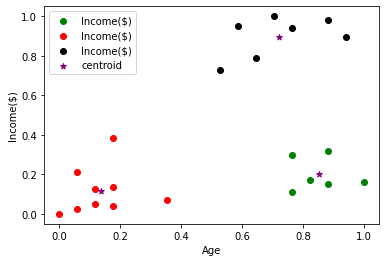

In [37]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# elbow plot


In [40]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

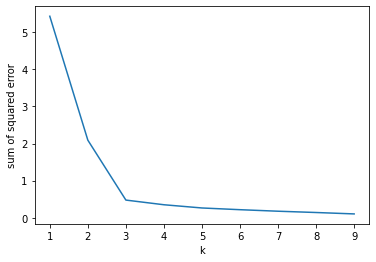

In [39]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)